<a href="https://colab.research.google.com/github/Kaustubh-20/ML_Practice/blob/main/Basic_EDA_%26_Scaling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
dataset.shape

(583, 11)

In [ ]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
dataset.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [ ]:
dataset['Gender'] = dataset['Gender'].replace({'Male': 0,'Female': 1 })

In [ ]:
mean_ratio= dataset['Albumin_and_Globulin_Ratio'].mean()
print(mean_ratio)
median_ratio= dataset['Albumin_and_Globulin_Ratio'].median()
print(median_ratio)

0.9470639032815197
0.93


In [ ]:
dataset['Albumin_and_Globulin_Ratio'].fillna(mean_ratio,inplace=True)

In [ ]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**MAPPING CORRELATION MATRIX**

In [ ]:
correlation = dataset.corr()

<Axes: >

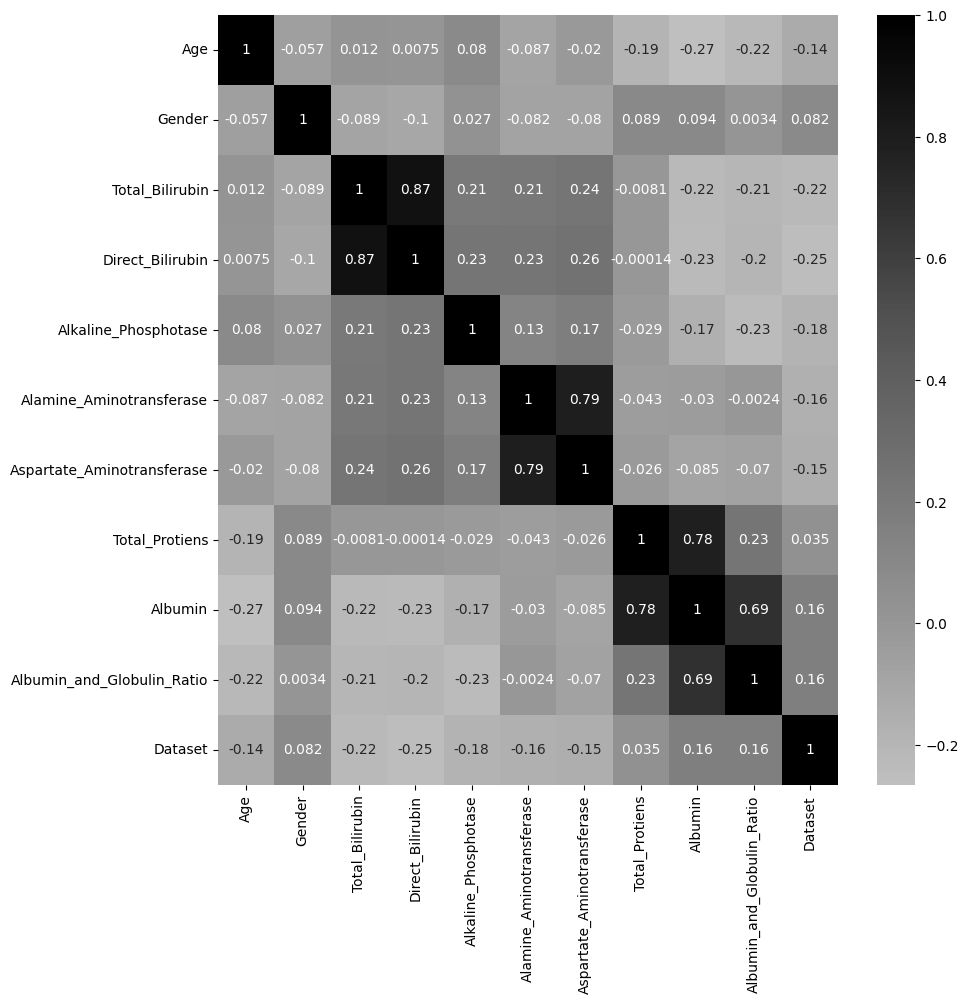

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True, cmap = 'Greys', center = 0)

**DROPPING CORRELATED VALUE TO MAKE VARIABLES INDEPENDENT AND PREVENT REDUNDANCY**

In [ ]:
dataset = dataset.drop(['Direct_Bilirubin' , 'Total_Protiens'],axis=1)

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,187,16,18,3.3,0.90,1
1,62,0,10.9,699,64,100,3.2,0.74,1
2,62,0,7.3,490,60,68,3.3,0.89,1
3,58,0,1.0,182,14,20,3.4,1.00,1
4,72,0,3.9,195,27,59,2.4,0.40,1


In [ ]:
dataset.shape

(583, 9)

**ADDING A DUMMY DATASET**

In [ ]:
dataset2 = pd.read_csv('/content/liver_disease2.csv')

In [ ]:
dataset2.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,45,Male,12.567,1250,45,70,4.2,0.9,Yes
1,32,Female,2.345,300,25,40,4.5,1.2,No
2,60,Male,8.901,1800,120,200,3.8,0.7,Yes
3,28,Female,1.234,150,15,30,4.8,1.0,No
4,49,Male,5.678,800,65,100,3.9,0.8,Yes


**CONVERTING MALE FEMALE TO NUMERIC**

In [ ]:
dataset2['Gender'] = dataset2['Gender'].replace({'Male': 0,'Female': 1 })

In [ ]:
dataset2['Dataset'] = dataset2['Dataset'].replace({'No': 0,'Yes': 1 })

In [ ]:
dataset2.shape

(17, 9)

**COMBINING BOTH DATASET**

In [ ]:
combined_dataset = pd.concat([dataset,dataset2])

In [ ]:
combined_dataset.shape

(600, 9)

**SCALING THE DATA**


USING STANDARD SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(combined_dataset)
print(scaled_data)

[[ 1.2647494   1.72438683 -0.43121576 ...  0.16365745 -0.14359434
  -0.56313978]
 [ 1.07828458 -0.57991628  1.22667396 ...  0.03920312 -0.65155096
  -0.56313978]
 [ 1.07828458 -0.57991628  0.64153641 ...  0.16365745 -0.17534163
  -0.56313978]
 ...
 [ 0.14596051  1.72438683  0.55847939 ...  0.66147479 -0.77854012
  -0.56313978]
 [-0.8485185  -0.57991628  0.01673954 ...  1.40820079 -0.14359434
  -2.68819553]
 [ 0.76750989  1.72438683  1.29900346 ... -0.20970555 -1.09601301
  -0.56313978]]


USING MINMAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler1 = MinMaxScaler()

In [ ]:
scaled_data1 = scaler1.fit_transform(combined_dataset)
print(scaled_data1)

[[0.70930233 1.         0.00402145 ... 0.52173913 0.24       0.5       ]
 [0.6744186  0.         0.14075067 ... 0.5        0.176      0.5       ]
 [0.6744186  0.         0.0924933  ... 0.52173913 0.236      0.5       ]
 ...
 [0.5        1.         0.08564343 ... 0.60869565 0.16       0.5       ]
 [0.31395349 0.         0.04096515 ... 0.73913043 0.24       0.        ]
 [0.61627907 1.         0.14671582 ... 0.45652174 0.12       0.5       ]]
